In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture

In [3]:
np.random.seed(0)
x_p = np.array([(np.random.normal(2.5, 0.5), np.random.normal(1.5, 0.5)) for _ in range(20)])
x_n = np.array([(np.random.normal(1.5, 0.5), np.random.normal(2.5, 0.5)) for _ in range(20)])

xs = np.concatenate([x_p, x_n])
ys = np.array([1]*len(x_p) + [0]*len(x_n))

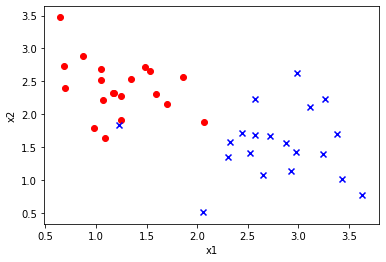

In [30]:
def plot_data_2d(ys=ys):
    markers = ['o', 'x', 'v', '>', ',']
    colors = ['red', 'blue', 'green', 'orange', 'black']
    for i in range(5):
        plt.scatter(xs[ys==i,0], xs[ys==i,1], marker=markers[i], c=colors[i])
    plt.xlabel('x1')
    plt.ylabel('x2')
    
plot_data_2d()

In [37]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
ys_pred = kmeans.predict(xs)
print(ys_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0]


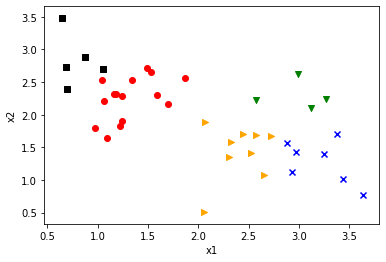

In [33]:
plot_data_2d(ys=ys_pred)

In [39]:
gmm = BayesianGaussianMixture(n_components=2, weight_concentration_prior_type='dirichlet_distribution')
gmm.fit(xs)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=2, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_distribution')

In [40]:
ys_pred = gmm.predict(xs)
print(ys_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1]


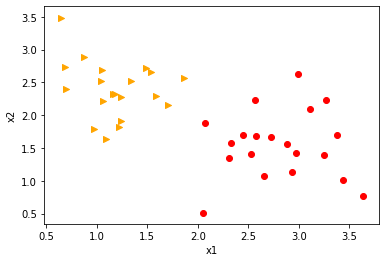

In [36]:
plot_data_2d(ys=ys_pred)